# stock market prediction using LSTM

# for data collection we have used pandas data reader which is a inbuild feature in pandas ..i have not mentioned api key for security issues

In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key= "key")

# after we have imported the data from the tiingo api we need to convert into csv

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

# exploring the data

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-03 00:00:00+00:00,122.57,123.49,120.70,120.79,45518976,28.313084,28.525599,27.881122,27.901912,182075904,0.00,1.0
1,AAPL,2015-11-04 00:00:00+00:00,122.00,123.82,121.62,123.13,44886050,28.181416,28.601828,28.093638,28.442441,179544200,0.00,1.0
2,AAPL,2015-11-05 00:00:00+00:00,120.92,122.69,120.18,121.85,39552680,28.052059,28.462679,27.880387,28.267808,158210720,0.52,1.0
3,AAPL,2015-11-06 00:00:00+00:00,121.06,121.81,120.62,121.11,33042283,28.084537,28.258529,27.982462,28.096137,132169132,0.00,1.0
4,AAPL,2015-11-09 00:00:00+00:00,120.57,121.81,120.05,120.96,33871405,27.970863,28.258529,27.850229,28.061338,135485620,0.00,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-10-26 00:00:00+00:00,115.05,116.55,112.8800,114.01,111850657,115.05,116.55,112.8800,114.01,111850657,0.0,1.0
1254,AAPL,2020-10-27 00:00:00+00:00,116.60,117.28,114.5399,115.49,92276772,116.60,117.28,114.5399,115.49,92276772,0.0,1.0
1255,AAPL,2020-10-28 00:00:00+00:00,111.20,115.43,111.1000,115.05,143937823,111.20,115.43,111.1000,115.05,143937823,0.0,1.0
1256,AAPL,2020-10-29 00:00:00+00:00,115.32,116.93,112.2000,112.37,146129173,115.32,116.93,112.2000,112.37,146129173,0.0,1.0
1257,AAPL,2020-10-30 00:00:00+00:00,108.86,111.99,107.7200,111.06,190573476,108.86,111.99,107.7200,111.06,190573476,0.0,1.0


# remove the index value and take the indepentent variable

In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       122.57
1       122.00
2       120.92
3       121.06
4       120.57
         ...  
1253    115.05
1254    116.60
1255    111.20
1256    115.32
1257    108.86
Name: close, Length: 1258, dtype: float64

In [ ]:
import matplotlib.pyplot as plt


# for LSTM we have to make the values small for good results as the lstm model is more sensitive so we will be using minmaxscalar

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.07752255],
       [0.07615153],
       [0.07355382],
       ...,
       [0.05017438],
       [0.06008419],
       [0.044546  ]])

# as this dataset is a time series data and each of the values is dependent on the pervious values so we cannot randomly split the data using normal train_test_split

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
# train_data

# now we have to convert the array values into matrix and most importantly the values of i will be starting from 0,1,2,3....99 as we have used 100 as we have mentioned the timestep 100
example if there is 1 2 3 4 ouput 5 this value 5 is dependent on the other 4 values on thee time  series data ...now as we give time stamp as 100 it we check the value before predicting the output 100 values before.

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

# before implementing any LSTM model we have to convert the data dimensions into a 3d dimension

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# create a LSTM layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0076 - val_loss: 0.0556
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0017 - val_loss: 0.0216
Epoch 3/100
12/12 [==============================] - 2s 180ms/step - loss: 5.2908e-04 - val_loss: 0.0223
Epoch 4/100
12/12 [==============================] - 2s 185ms/step - loss: 4.1503e-04 - val_loss: 0.0204
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 3.6073e-04 - val_loss: 0.0201
Epoch 6/100
12/12 [==============================] - 2s 181ms/step - loss: 3.3616e-04 - val_loss: 0.0195
Epoch 7/100
12/12 [==============================] - 2s 182ms/step - loss: 3.2638e-04 - val_loss: 0.0189
Epoch 8/100
12/12 [==============================] - 2s 188ms/step - loss: 3.1668e-04 - val_loss: 0.0184
Epoch 9/100
12/12 [==============================] - 2s 191ms/step - loss: 3.1923e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 2s 186ms/

In [ ]:
import tensorflow as tf

# now we have to predict the model

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

# as we have converted into small values using minmaxscaler we are converting back into the original values

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# to check wheather our LSTM model have done good we have the check the mean square error value

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

156.25532480710353

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

276.8269867575707

# for plotting train predictions

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# for plotting test predictions

In [ ]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plotting 

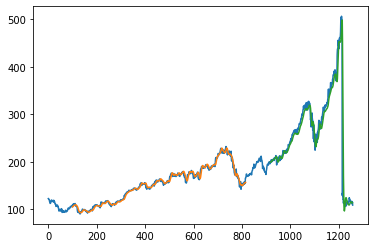

In [ ]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,

##predicting for next 10 days

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.05345364]
101
1 day input [0.59761876 0.60769693 0.62956103 0.62838244 0.62871918 0.62388455
 0.64589296 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236
 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203
 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446 0.711365
 0.70948888 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029
 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0